In [95]:
from string import (ascii_lowercase, ascii_uppercase, digits, ascii_letters)
from itertools import (permutations, combinations)
from random import sample

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.cm as cm
import numpy as np
np.random.seed(2025 - 4 - 16)
from scipy.interpolate import griddata

In [237]:
graph = nx.Graph()
graph.add_nodes_from(list(ascii_letters + digits))
graph.add_edges_from(sample(list(combinations(ascii_uppercase, r=2)), k=25))
graph.add_edges_from(sample(list(combinations(ascii_lowercase, r=2)), k=30))
graph.add_edges_from(sample(list(combinations(digits, r=2)), k=10))

# make multi-mycorrhizal connections
graph.add_edges_from(sample(list(combinations(ascii_letters + digits, r=2)), k=15))

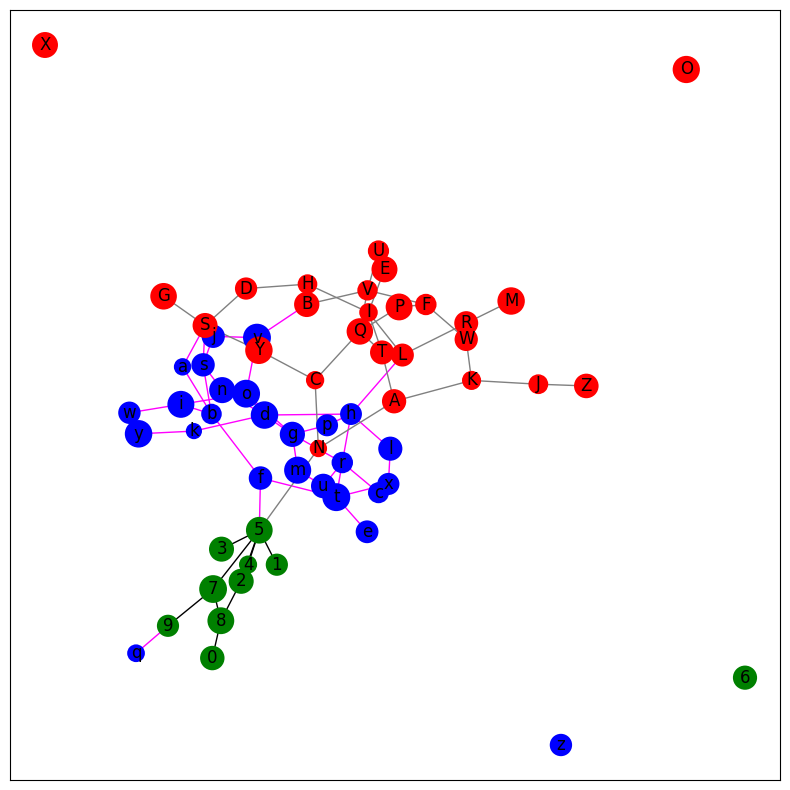

In [32]:
fig = plt.figure()
fig.set_size_inches(8, 8)
# axes = fig.add_subplot(projection="3d")
axes = fig.add_subplot()
nx.draw_networkx(G=graph, ax=axes, node_size=np.random.randint(low=100, high=350, size=len(graph.nodes)), # size of the nodes represent source strength
                 node_color=np.array(["red" if node in ascii_uppercase else "blue" if node in ascii_lowercase else "green" for node in graph.nodes]),
                 edge_color=np.array(["grey" if x in ascii_uppercase else "magenta" if x in ascii_lowercase else "black" for (x, y) in graph.edges]), linewidths=1.5)
plt.tight_layout()
# axes.set_xticks(np.arange(0, 1, 0.005), np.arange(0, 1, 0.005))
# axes.xaxis.set_tick_params(labelbottom=True)
# plt.show()
plt.savefig(r"./nxcmn.jpeg", format="jpeg", dpi=850)

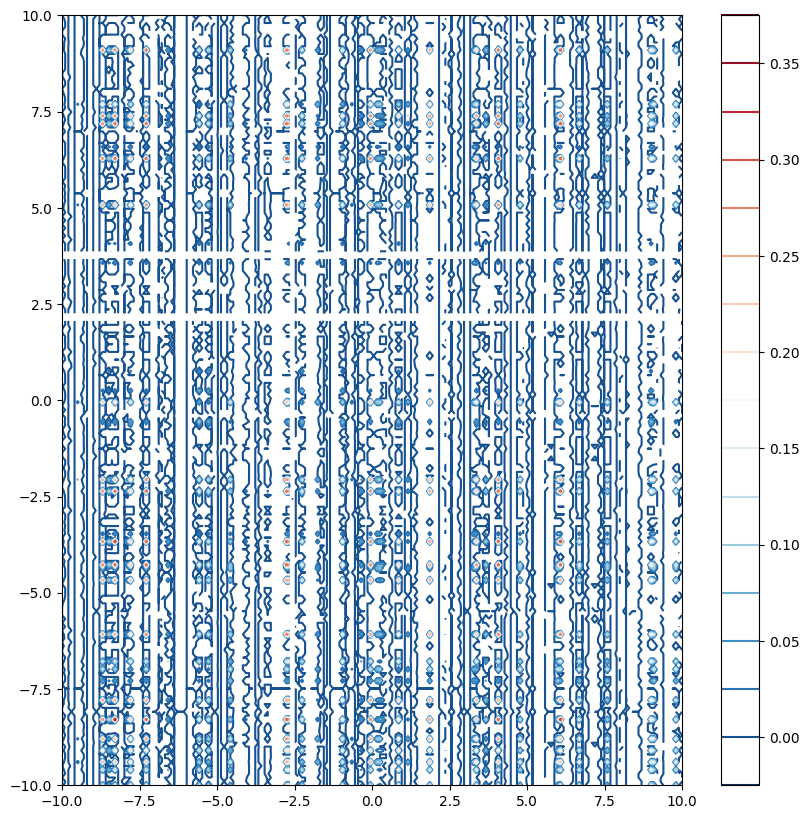

In [41]:
x = np.random.uniform(low=-10, high=10, size=200)
y = np.random.uniform(low=-10, high=10, size=200)
z = x * np.exp(-x**2 - y**2)

x_grid = np.linspace(start=-10, stop=10, num=200)
y_grid = np.linspace(start=-10, stop=10, num=200)
z_grid = griddata(points=(x, y), values=z, xi=(x[None, :], y[:, None]), method='linear')

fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.contour(x_grid, y_grid, z_grid, levels=14, linewidths=0.5, colors='k')
contour = axes.contour(x_grid, y_grid, z_grid, levels=14, cmap="RdBu_r")
fig.colorbar(contour, ax=axes)
# axes.plot(x, y, 'ko', ms=3)
axes.set(xlim=(-10, 10), ylim=(-10, 10))

# for linear interpolation - https://en.wikipedia.org/wiki/Linear_interpolation

plt.show()

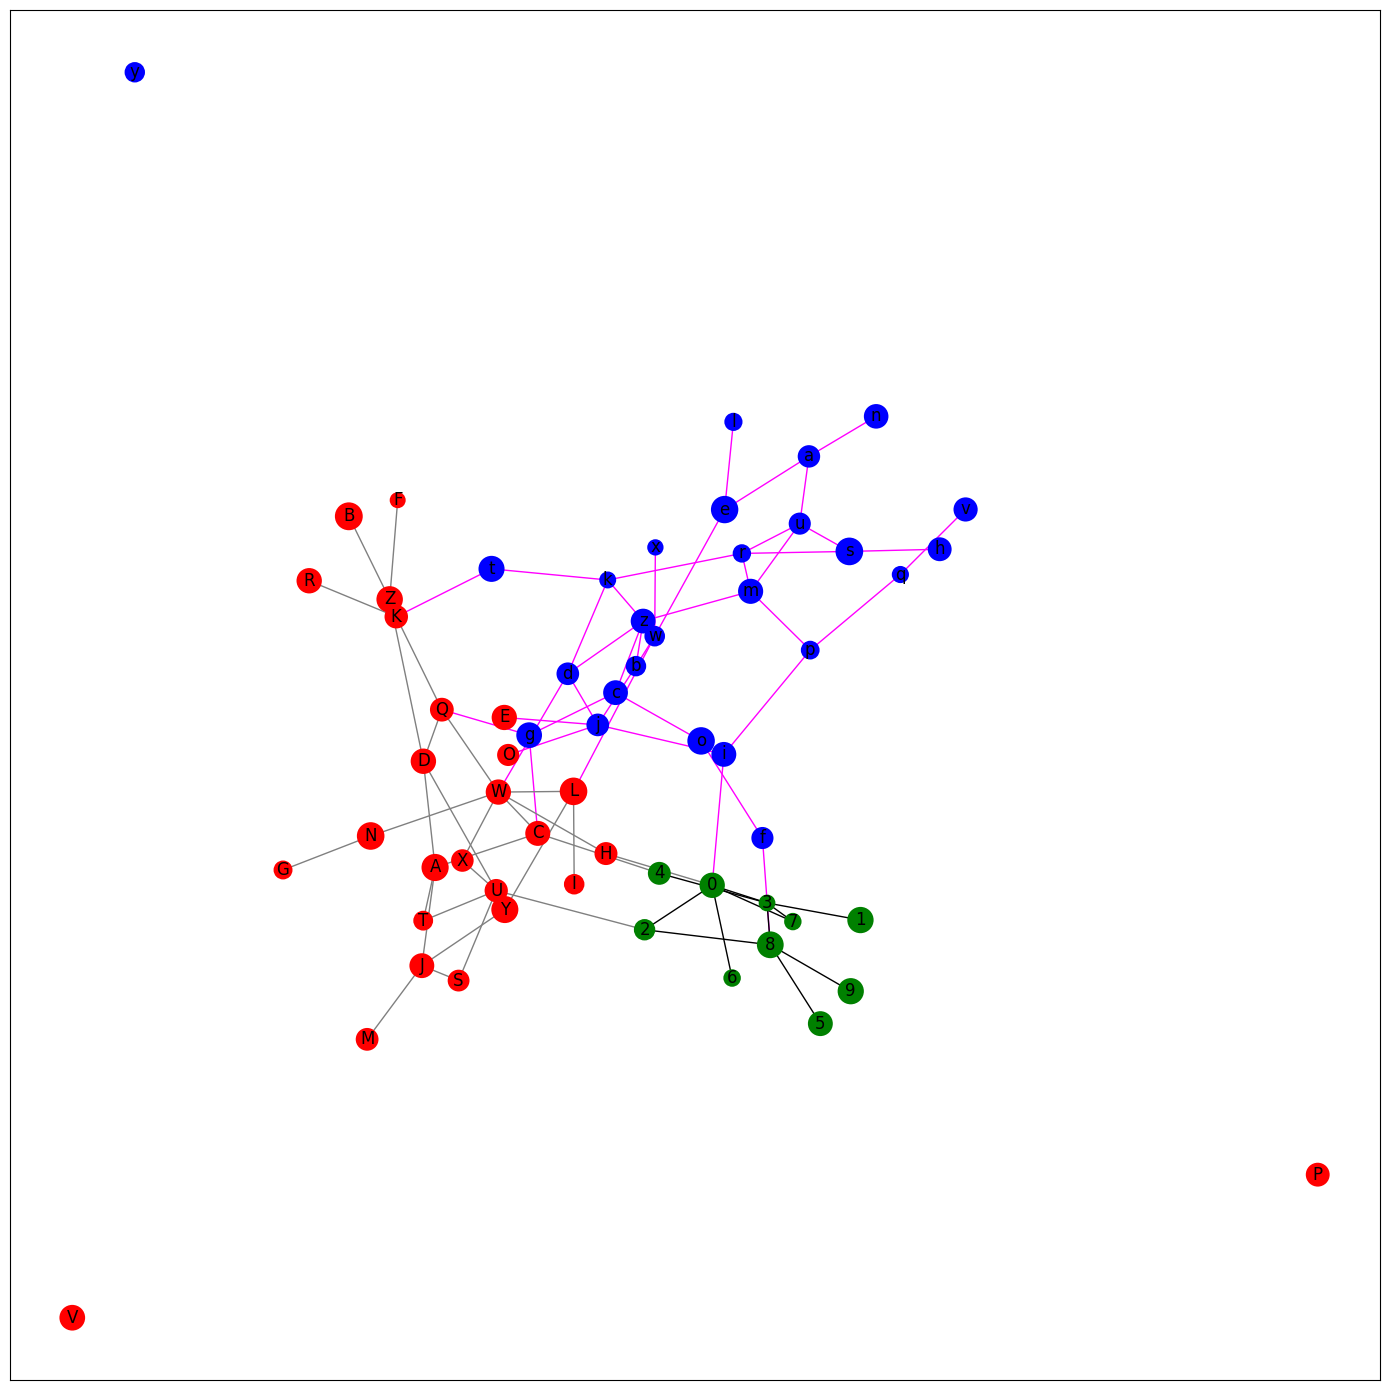

In [254]:
colour_matrix = np.random.randint(low=0, high=150, size=(500, 500))

# x, y coordinates for the nutrient rich spots
hotspot_x_axis = np.linspace(start=100, stop=400, num=8).astype(np.int32) # left most
hotspot_y_axis = np.random.randint(low=100, high=400, size=hotspot_x_axis.size) # bottom most

# mutate the values near these select coordinates to create hotspots
for (x, y) in zip(hotspot_x_axis, hotspot_y_axis):
    # x_span = np.random.choice(np.arange(start=x-100, stop=x+100, step=1), replace=False, size=150)
    x_span = np.random.normal(loc=x, scale=20, size=2250).astype(np.int32)
    # y_span = np.random.choice(np.arange(start=y-100, stop=y+100, step=1), replace=False, size=150) 
    y_span = np.random.normal(loc=y, scale=20, size=2250).astype(np.int32)
    # colour_matrix[x_span][:, y_span] = np.random.randint(low=200, high=350, size=(150, 150))
    colour_matrix[x_span, y_span] = np.random.randint(low=200, high=350, size=2250)

fig, axes = plt.subplots()
fig.set_size_inches(14, 14)
# axes.matshow(colour_matrix, cmap="YlOrRd")
# axes.scatter(hotspot_x_axis, hotspot_y_axis, s=10, color="red")
# fig.colorbar(cax=cbar, mappable=cm.ScalarMappable())
axes.set_xticks([])
axes.set_yticks([])

nx.draw_networkx(G=graph, ax=axes, node_size=np.random.randint(low=100, high=350, size=len(graph.nodes)), # size of the nodes represent source strength
                 node_color=np.array(["red" if node in ascii_uppercase else "blue" if node in ascii_lowercase else "green" for node in graph.nodes]),
                 edge_color=np.array(["grey" if x in ascii_uppercase else "magenta" if x in ascii_lowercase else "black" for (x, y) in graph.edges]), linewidths=1.5)

plt.tight_layout()
plt.show()

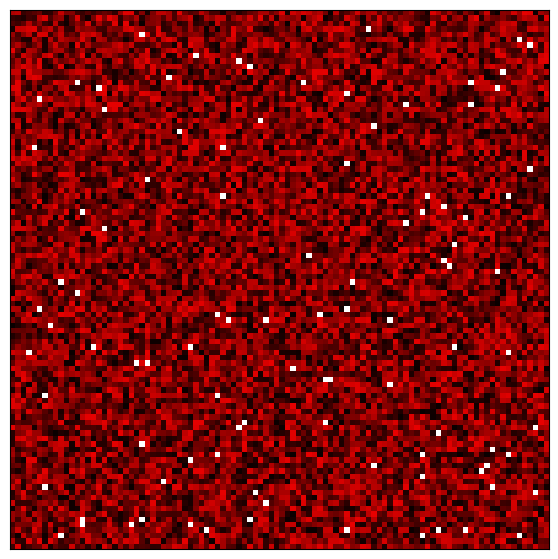

In [226]:
mat = np.random.randint(low=0, high=100, size=(100, 100))
mat[np.random.randint(low=0, high=100, size=100), np.random.randint(low=0, high=100, size=100)] = 300

fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.matshow(mat, cmap="hot")
axes.set_xticks([])
axes.set_yticks([])
plt.show()